import neccessary liberaries

In [54]:
import yfinance as yf
import os
import sys

sys.path.append(os.path.abspath('../scripts'))
sys.path.append(os.path.abspath('../src'))

# Load Tesla data
tsla_data = yf.download('TSLA', start='2010-01-01', end='2023-12-31')['Adj Close']
BND_data = yf.download('BND', start='2010-01-01', end='2023-12-31')['Adj Close']
SPY_data = yf.download('SPY', start='2010-01-01', end='2023-12-31')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


import the class form scripts folder 

In [55]:
from TimeSeriesForecast import TimeSeriesForecast

instantiate the class

In [56]:
# Instantiate the forecasting class
TimeSeriesForecas = TimeSeriesForecast(tsla_data)
TimeSeriesForecast_for_spy = TimeSeriesForecast(SPY_data)
TimeSeriesForecast_for_bnd = TimeSeriesForecast(BND_data)



Data split into 2720 training samples and 680 testing samples.
Data split into 2817 training samples and 705 testing samples.
Data split into 2817 training samples and 705 testing samples.


ARIMA model

In [57]:
# Train the ARIMA model
TimeSeriesForecas.train_arima(order=(5, 1, 0))



c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA model trained successfully.


In [58]:
# Forecast future stock prices
predictions = TimeSeriesForecas.forecast_arima()



c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [59]:
# Evaluate the forecast
mae, rmse, mape = TimeSeriesForecas.evaluate_forecast()



Mean Absolute Error (MAE): 44.76951005016132
Root Mean Squared Error (RMSE): 58.45733650633049
Mean Absolute Percentage Error (MAPE): 19.10712190739271%


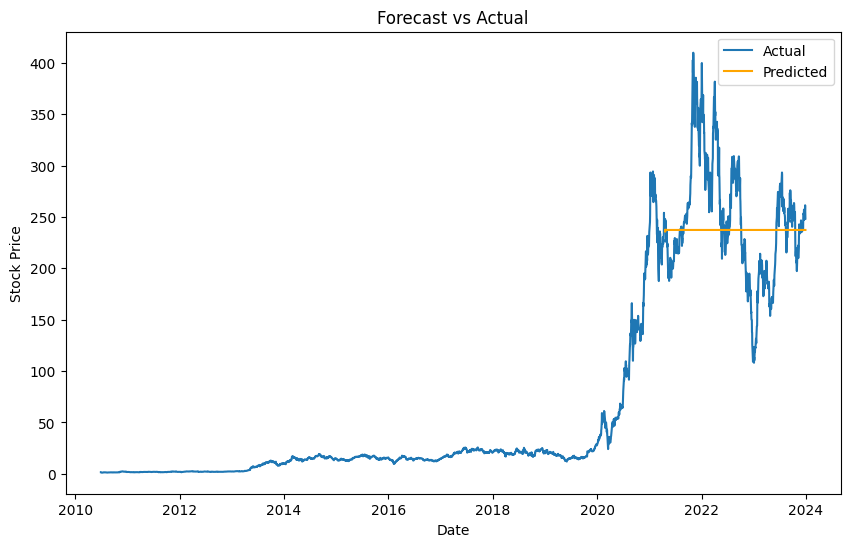

In [60]:
# Plot the results
TimeSeriesForecas.plot_forecast()

SARIMA model

In [61]:
# Train the SARIMA model
TimeSeriesForecas.train_sarima(order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))



c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA model trained successfully.


In [62]:
# Forecast future stock prices
sarima_predictions = TimeSeriesForecas.forecast_sarima()



c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [63]:
# Evaluate the forecast
TimeSeriesForecas.evaluate_forecast()


Mean Absolute Error (MAE): 141.98606557414152
Root Mean Squared Error (RMSE): 174.62709288533625
Mean Absolute Percentage Error (MAPE): 67.88039173399966%


(np.float64(141.98606557414152),
 174.62709288533625,
 np.float64(67.88039173399966))

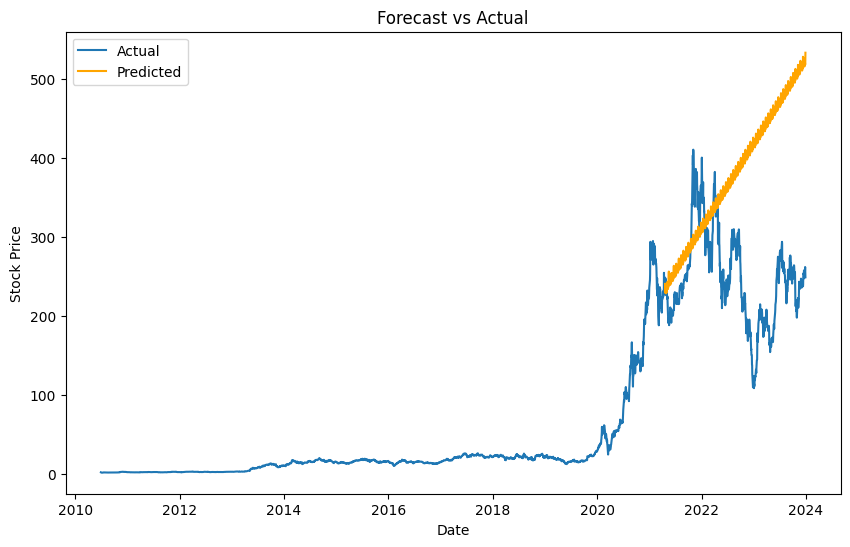

In [64]:

# Plot the results
TimeSeriesForecas.plot_forecast()

LSTM model

In [65]:
# Preprocess data for LSTM
TimeSeriesForecas.preprocess_for_lstm(window_size=60)



Data preprocessed for LSTM model.


In [66]:
# Train the LSTM model
TimeSeriesForecas.train_lstm(epochs=50, batch_size=32)



c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0042
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 3.7224e-04
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 4.2375e-04
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 4.1002e-04
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.1399e-04
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.9777e-04
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.9403e-04
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 4.1510e-04
Epoch 9/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 2.9047e-04
Epoch 10/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.0867e-04
Epoch 11/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.4045e-04
Epoch 12/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.6945e-04
Epoch 13/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.7850e-04
Epoch 14/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.9364e-04
Epoch 15/50
84/84 ━

In [67]:
# Forecast future stock prices
lstm_predictions = TimeSeriesForecas.forecast_lstm()



21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [68]:
# Evaluate the forecast
TimeSeriesForecas.evaluate_forecast()



Mean Absolute Error (MAE): 24.162422442864514
Root Mean Squared Error (RMSE): 30.47884831385824
Mean Absolute Percentage Error (MAPE): 10.367489419055847%


(np.float64(24.162422442864514),
 30.47884831385824,
 np.float64(10.367489419055847))

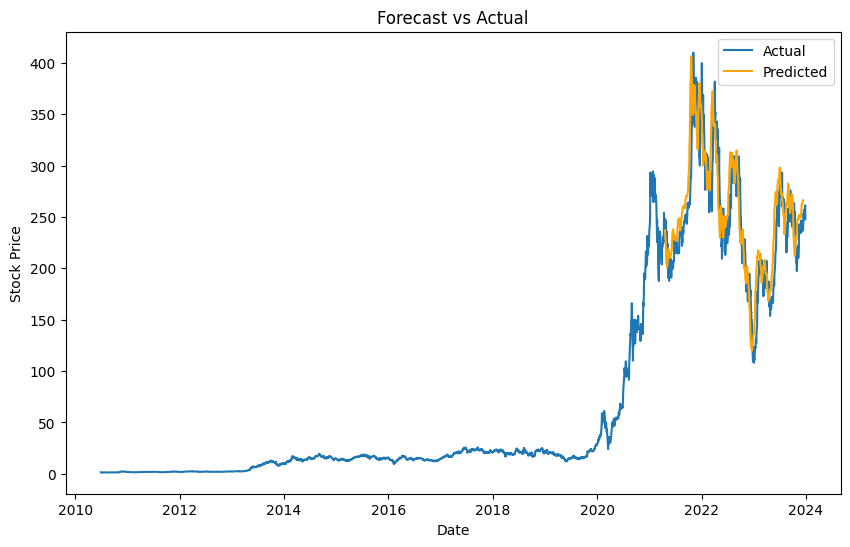

In [69]:
# Plot the results
TimeSeriesForecas.plot_forecast()

for BND data

In [70]:
BND_data

Ticker,BND
Date,
2010-01-04 00:00:00+00:00,51.721802
2010-01-05 00:00:00+00:00,51.873013
2010-01-06 00:00:00+00:00,51.853275
2010-01-07 00:00:00+00:00,51.813831
2010-01-08 00:00:00+00:00,51.866421
...,...
2023-12-22 00:00:00+00:00,71.401604
2023-12-26 00:00:00+00:00,71.469742
2023-12-27 00:00:00+00:00,71.927193


ARIMA model for bnd 

In [71]:
# Train the ARIMA model
TimeSeriesForecast_for_bnd.train_arima(order=(5, 1, 0))

ARIMA model trained successfully.


c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [72]:
# Forecast future stock prices
predictions = TimeSeriesForecast_for_bnd.forecast_arima()

c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [73]:
# Evaluate the forecast
mae, rmse, mape = TimeSeriesForecast_for_bnd.evaluate_forecast()


Mean Absolute Error (MAE): 5.191604570859045
Root Mean Squared Error (RMSE): 6.1129290848249624
Mean Absolute Percentage Error (MAPE): 7.471680401300042%


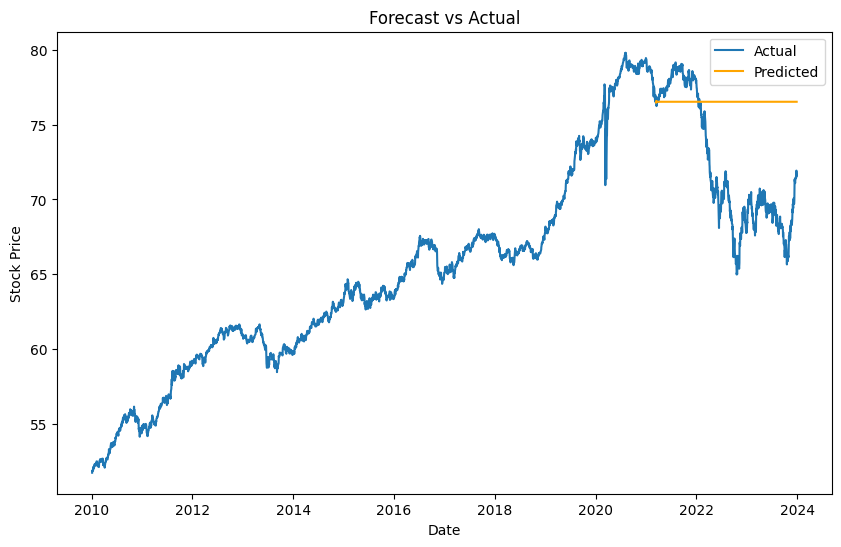

In [74]:
# Plot the results
TimeSeriesForecast_for_bnd.plot_forecast()

SARIMA model

In [75]:
# Train the SARIMA model
TimeSeriesForecast_for_bnd.train_sarima(order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))

c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA model trained successfully.


In [76]:
# Forecast future stock prices
sarima_predictions = TimeSeriesForecast_for_bnd.forecast_sarima()

c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [77]:
# Evaluate the forecast
TimeSeriesForecast_for_bnd.evaluate_forecast()


Mean Absolute Error (MAE): 7.65083198005319
Root Mean Squared Error (RMSE): 9.303886366974103
Mean Absolute Percentage Error (MAPE): 11.057073453760257%


(np.float64(7.65083198005319),
 9.303886366974103,
 np.float64(11.057073453760257))

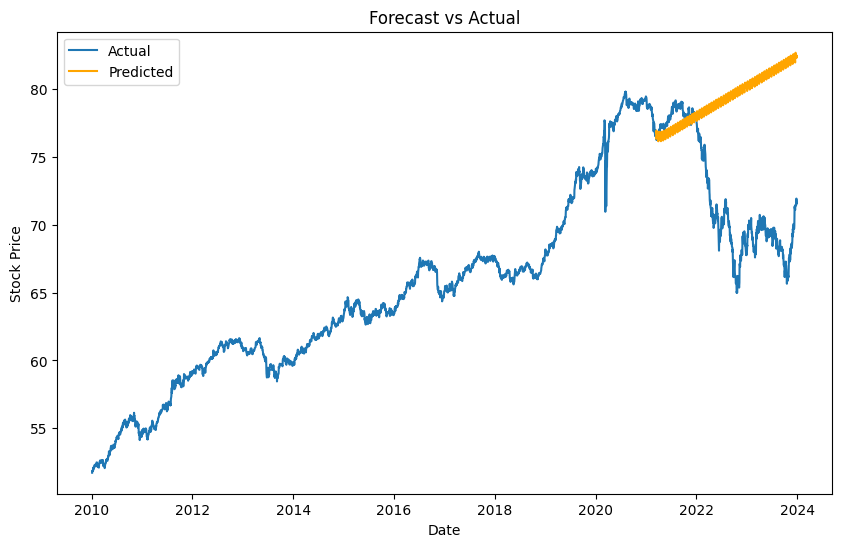

In [78]:
# Plot the results
TimeSeriesForecast_for_bnd.plot_forecast()

LSTM model

In [79]:
# Preprocess data for LSTM
TimeSeriesForecast_for_bnd.preprocess_for_lstm(window_size=60)

Data preprocessed for LSTM model.


In [80]:
# Train the LSTM model
TimeSeriesForecast_for_bnd.train_lstm(epochs=50, batch_size=32)

c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0313
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0024
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0027
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0024
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0021
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0018
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0020
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0015
Epoch 9/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0016
Epoch 10/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0019
Epoch 11/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0015
Epoch 12/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0017
Epoch 13/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0015
Epoch 14/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0013
Epoch 15/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0014
Epoc

In [81]:
# Forecast future stock prices
lstm_predictions = TimeSeriesForecast_for_bnd.forecast_lstm()

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [82]:
# Evaluate the forecast
TimeSeriesForecast_for_bnd.evaluate_forecast()

Mean Absolute Error (MAE): 0.5794721661191998
Root Mean Squared Error (RMSE): 0.7180850609550091
Mean Absolute Percentage Error (MAPE): 0.8183974534693198%


(np.float64(0.5794721661191998),
 0.7180850609550091,
 np.float64(0.8183974534693198))

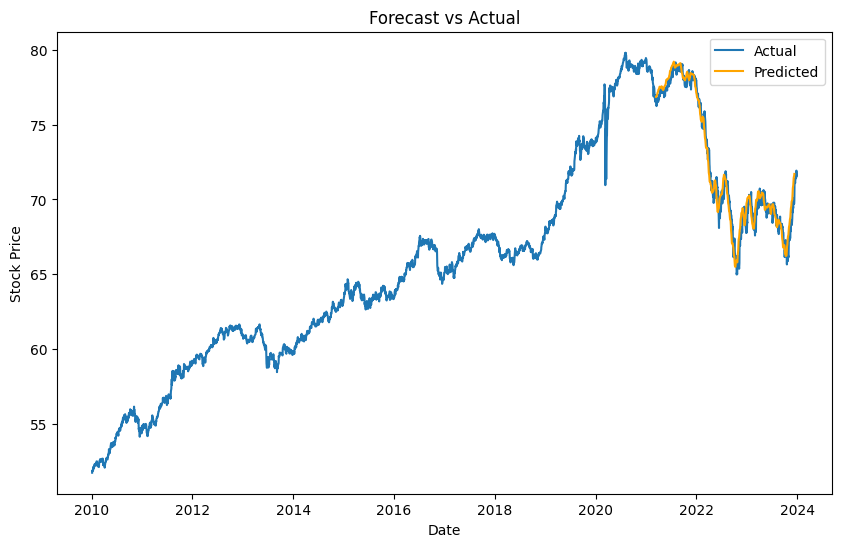

In [83]:
# Plot the results
TimeSeriesForecast_for_bnd.plot_forecast()

for tsla_data

In [84]:
SPY_data

Ticker,SPY
Date,
2010-01-04 00:00:00+00:00,86.316010
2010-01-05 00:00:00+00:00,86.544479
2010-01-06 00:00:00+00:00,86.605408
2010-01-07 00:00:00+00:00,86.970985
2010-01-08 00:00:00+00:00,87.260414
...,...
2023-12-22 00:00:00+00:00,469.225250
2023-12-26 00:00:00+00:00,471.206573
2023-12-27 00:00:00+00:00,472.058563


ARIMA model

In [85]:
# Train the ARIMA model
TimeSeriesForecast_for_spy.train_arima(order=(5, 1, 0))

ARIMA model trained successfully.


c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [86]:
# Forecast future stock prices
predictions = TimeSeriesForecast_for_spy.forecast_arima()

c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [87]:
# Evaluate the forecast
mae, rmse, mape = TimeSeriesForecast_for_spy.evaluate_forecast()

Mean Absolute Error (MAE): 38.40799817106395
Root Mean Squared Error (RMSE): 45.38869463204604
Mean Absolute Percentage Error (MAPE): 9.037485081116882%


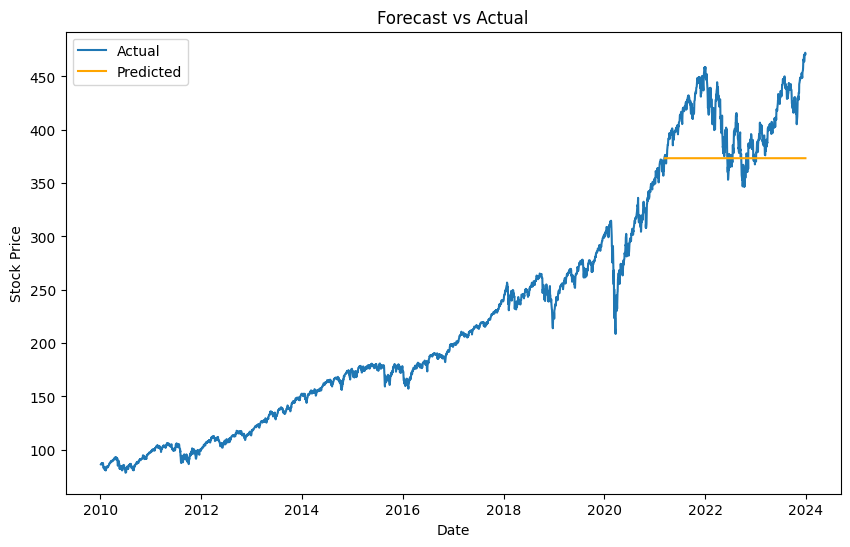

In [88]:
# Plot the results
TimeSeriesForecast_for_spy.plot_forecast()

SARIMA model

In [89]:
# Train the SARIMA model
TimeSeriesForecast_for_spy.train_sarima(order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))

c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA model trained successfully.


In [90]:

# Forecast future stock prices
sarima_predictions = TimeSeriesForecast_for_spy.forecast_sarima()

c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [91]:
# Evaluate the forecast
TimeSeriesForecast_for_spy.evaluate_forecast()

Mean Absolute Error (MAE): 59.09139987885195
Root Mean Squared Error (RMSE): 69.14697771762556
Mean Absolute Percentage Error (MAPE): 14.663348495533675%


(np.float64(59.09139987885195),
 69.14697771762556,
 np.float64(14.663348495533675))

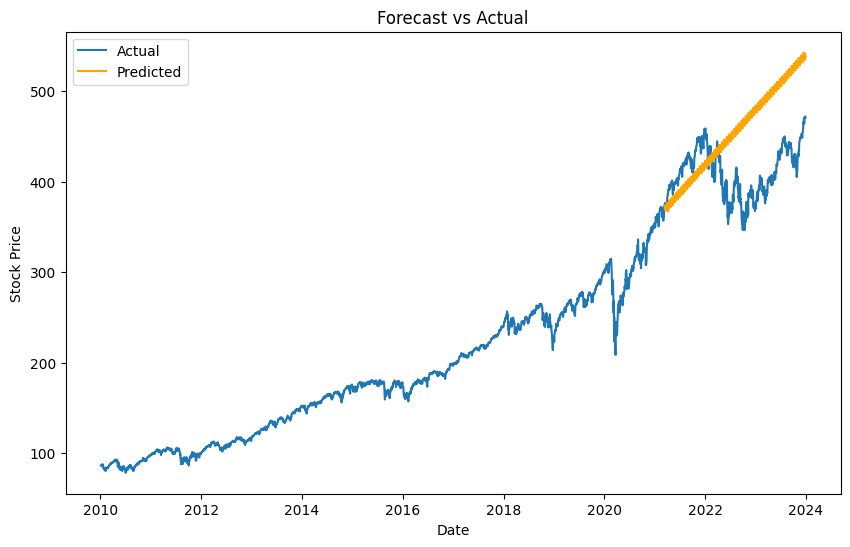

In [92]:
# Plot the results
TimeSeriesForecast_for_spy.plot_forecast()

LSTM model

In [93]:
# Preprocess data for LSTM
TimeSeriesForecast_for_spy.preprocess_for_lstm(window_size=60)

Data preprocessed for LSTM model.


In [94]:
# Train the LSTM model
lstm_for_tesla = TimeSeriesForecast_for_spy.train_lstm(epochs=50, batch_size=32)

c:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0185
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0011
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0011
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 9.0359e-04
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 8.1941e-04
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 8.9238e-04
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 9.0375e-04
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 8.1360e-04
Epoch 9/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 7.6078e-04
Epoch 10/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 6.7311e-04
Epoch 11/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 7.2113e-04
Epoch 12/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 6.7705e-04
Epoch 13/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 5.9763e-04
Epoch 14/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 6.2696e-04
Epoch 15/50
87/87 ━━━━━━━━━

In [95]:
# Forecast future stock prices
lstm_predictions = TimeSeriesForecast_for_spy.forecast_lstm()

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [96]:
# Evaluate the forecast
TimeSeriesForecast_for_spy.evaluate_forecast()

Mean Absolute Error (MAE): 10.495325922449945
Root Mean Squared Error (RMSE): 12.866033356813457
Mean Absolute Percentage Error (MAPE): 2.5893346896470866%


(np.float64(10.495325922449945),
 12.866033356813457,
 np.float64(2.5893346896470866))

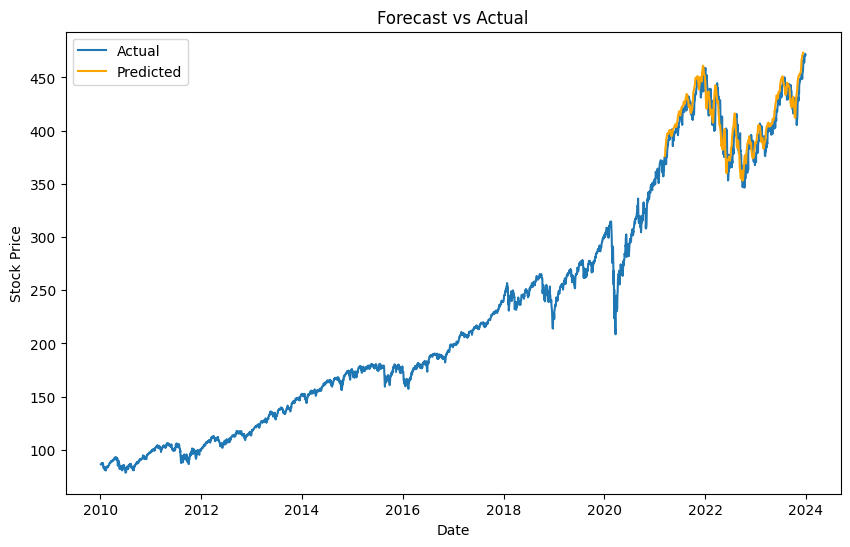

In [97]:
# Plot the results
TimeSeriesForecast_for_spy.plot_forecast()

save the best models

In [103]:
TimeSeriesForecast_for_spy.save_lstm_model(filename=r'C:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\models\lstm_model_for_spy.keras')
TimeSeriesForecast_for_bnd.save_lstm_model(filename=r'C:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\models\lstm_model_for_bnd.keras')
TimeSeriesForecas.save_lstm_model(filename=r'C:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\models\lstm_model_for_tesla.keras')

LSTM model saved to C:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\models\lstm_model_for_spy.keras
LSTM model saved to C:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\models\lstm_model_for_bnd.keras
LSTM model saved to C:\Users\befekadum\Documents\10x acadamy\week11\Time-Series-Forecasting\models\lstm_model_for_tesla.keras
